<a href="https://colab.research.google.com/github/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_III/blob/main/Raja_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> 1. Problem Statement </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## **2. GitHub Link** 
https://github.com/Rajakumaran-S/Credit_Card_Default_Prediction_Capstone-Project_II

## <b> 3. Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

## 4. Understanding of the data

In [ ]:
#Impoting all required Librarys:
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Reading Dataset:
df = pd.read_csv('C:/Users/Windows/Desktop/Capstone project III/credit_card_default_prediction.xls.csv', header = 1)

In [ ]:
#Checking Sample data in thr dataset:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Checking info of the Dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#All columns in the dataset:
columns=df.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### Describing the columns 

* ID: ID of each customer
* LIMIT_BAL: Amount of the given credit (NT dollar)
* SEX: Gender(Male = 1, Female: 2)
* EDUCATION: (1= graduate school, 2=University, 3=High School, 0,4,5,6 = Others)
* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)
* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)
* PAY_0: Repayment status in September, 2005 (same scale as given)
* PAY_2: Repayment status in August, 2005 (same scale as given)
* PAY_3: Repayment status in July, 2005 (same scale as given)
* PAY_4: Repayment status in June, 2005 (same scale as given)
* PAY_5: Repayment status in May, 2005 (same scale as given)
* PAY_6: Repayment status in April, 2005 (same scale as given)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default payment next month: Default Payments(1 = Yes, 0 = No)

We have been provided with 6 months credit card transaction history along with the informative details of customer and their current status, on the basis of this dataset we have to predict either he/she is a defaulter or not if he/she possess with these qualities.

In [ ]:
# renaming features Rename the names of features according to the description which is written above, 
# it will make our task easy in Exploratoy data analysis and in further appoaches.
df.rename(columns={'PAY_0':'REPAY_SEPT','PAY_2':'REPAY_AUG','PAY_3':'REPAY_JULY','PAY_4':'REPAY_JUNE','PAY_5':'REPAY_MAY','PAY_6':'REPAY_APRIL',
                    'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JULY','BILL_AMT4':'BILL_AMT_JUNE','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APRIL',
                    'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JULY','PAY_AMT4':'PAY_AMT_JUNE','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APRIL',
                    'default payment next month': 'Default_Payments'},inplace = True)

In [ ]:
#Describe the dataset:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,...,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,Default_Payments
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL',
       'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL',
       'Default_Payments'],
      dtype='object')

In [ ]:
#Checking duplicates in the dataset:
print(len(df[df.duplicated()]))

0


### Observation:
    * There are 30000 rows and 25 columns(Features) in the dataset
    * there is no null values and duplicates values in the dataset
    * our target variable is default payment next month

## 4. EDA 

### 4.1 Target Variable

In [ ]:
df['Default_Payments'].value_counts().sort_index()

0    23364
1     6636
Name: Default_Payments, dtype: int64

<AxesSubplot: xlabel='Default_Payments', ylabel='count'>

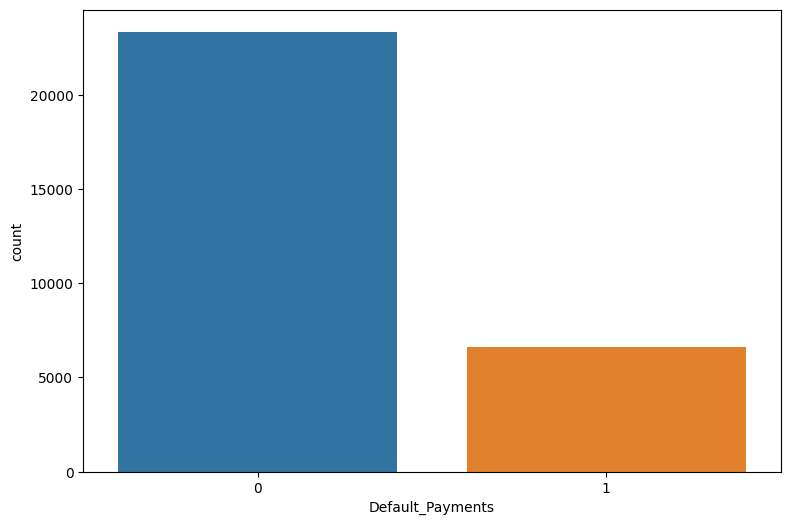

In [ ]:
#check target variable value proportion
plt.figure(figsize=(9,6))
sns.countplot(x = 'Default_Payments', data = df)

In [ ]:
#Checking percentage of defaulter
df['Default_Payments'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Default_Payments, dtype: float64

### Observation:
* we have a imbalanced of a target variable in the dataset
* 22% of customers has default payment next month 

### 4.2 Independent Variable:

In [ ]:
#Continious columns in the dataset
con_columns=df.columns[12:24]
con_columns

Index(['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL'],
      dtype='object')

In [ ]:
#Categorical columns
cat_columns=df.columns[1:12]
cat_columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_SEPT',
       'REPAY_AUG', 'REPAY_JULY', 'REPAY_JUNE', 'REPAY_MAY', 'REPAY_APRIL'],
      dtype='object')

In [ ]:
# Sex vs deafault payment
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# Education
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

Here, counts of 0,4,5,6 comes in others category so we'll merge all this in one category.

In [ ]:
fill = ((df['EDUCATION'] == 0) | (df['EDUCATION'] >= 5))
df.loc[fill, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
# Marriage
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to description of dataset 0 is also comes in others classification. So, I am going add 0 classification with 3.

In [ ]:
# Converting Marriage feature into 3 ossible classifiation
fill_1 = df['MARRIAGE'] == 0
df.loc[fill_1, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [ ]:
# Creating a dataframe with categorical features and dependent variable 
categorical_features = ['SEX','EDUCATION','MARRIAGE']
df_cat = df[categorical_features]
df_cat['Defaulters'] = df['Default_Payments']
df_cat.head(3) 

,SEX,EDUCATION,MARRIAGE,Defaulters
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0


There is another thing that need to be done here, we have to change the classification denotion from 0,1,2,3 to a reasonable class that they actually tells us in the data description for e.g.,

Sex: (1 = Male,0 = Female)

So, we have to this with all the three categorical features.

In [ ]:
# Now replace the classification denotion 
df_cat['SEX'].replace({1 : 'Male',2 : 'Female'}, inplace = True)
df_cat['EDUCATION'].replace({1 : 'Graduates',2 : 'University',3 : 'High School',4 : 'Others'},inplace = True)
df_cat['MARRIAGE'].replace({1 : 'Married',2 : 'Single',3 : 'Others'},inplace = True)
df_cat

,SEX,EDUCATION,MARRIAGE,Defaulters
0,Female,University,Married,1
1,Female,University,Single,1
2,Female,University,Single,0
3,Female,University,Married,0
4,Male,University,Married,0
...,...,...,...,...
29995,Male,High School,Married,0
29996,Male,High School,Single,0
29997,Male,University,Single,1
29998,Male,High School,Married,1


### **Plotting all these Categorical features with Dependent variable** 
---

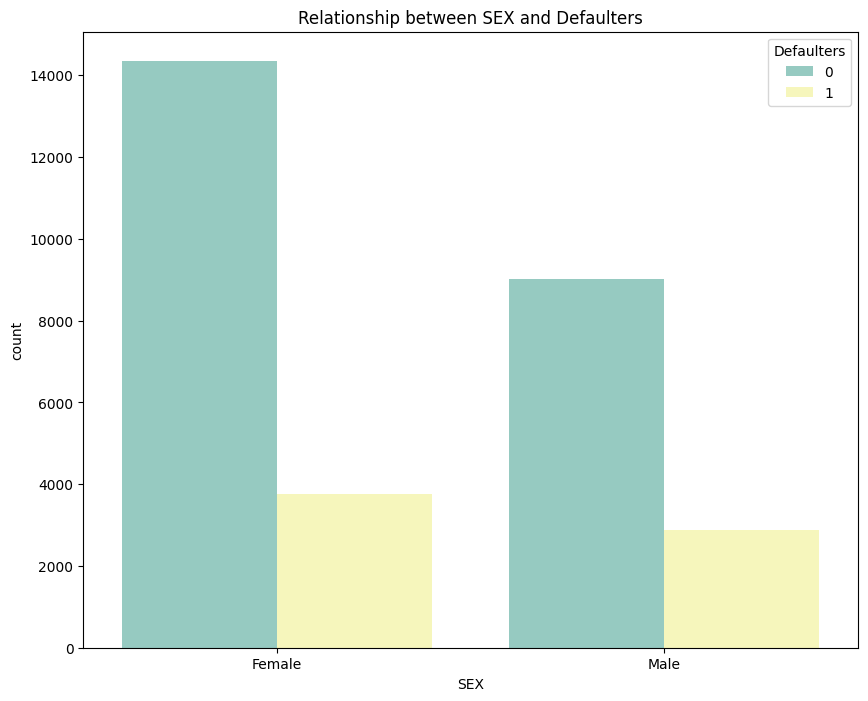

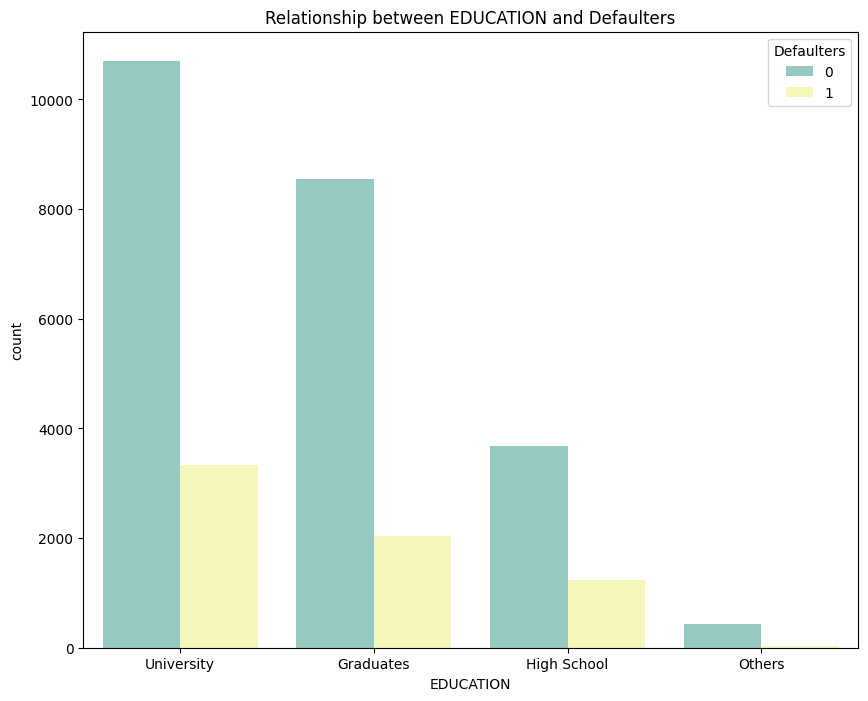

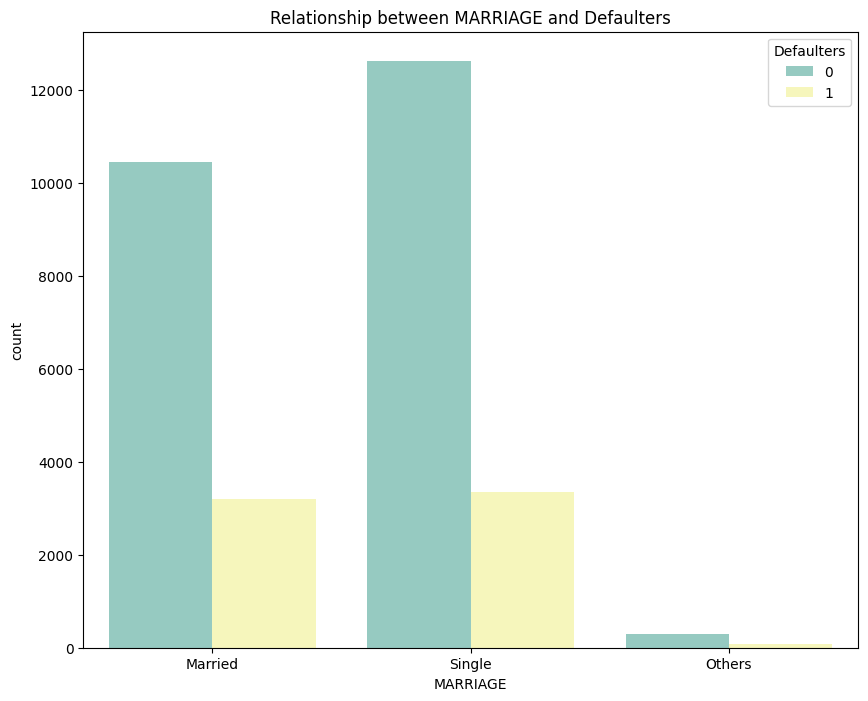

In [ ]:
# categorical features with dependent variable 
for col in categorical_features:
  fig, ax = plt.subplots(figsize = (10,8))
  sns.countplot(x = col, hue = 'Defaulters', data = df_cat,palette = "Set3")
  ax.set(title = 'Relationship between ' +col+ ' and Defaulters')

### Observation:

* Females have the majority holding of cred cards in comparison to males but ratio of defaulters is high in Males.
* University and Graduates are holding high proportions of Credit cards.
* Singles and Married have proportion of credit cards according to the countplot singles have more numbers in defaulters.

### **PAYMENT HISTORY ACCORDING TO MONTHS**
---

### Having insights of Pay scale with Default Payments 

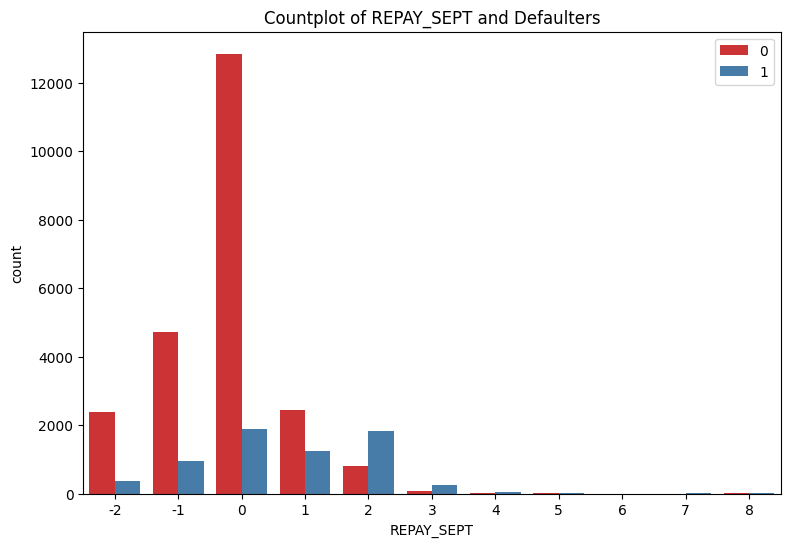

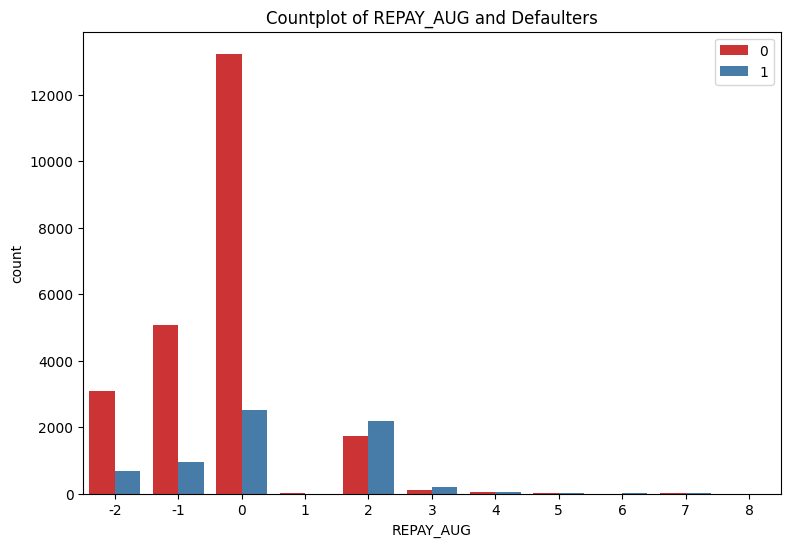

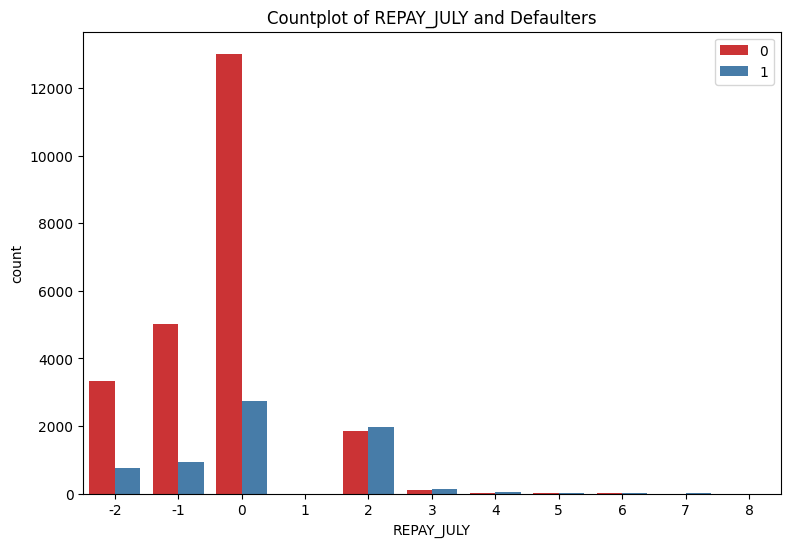

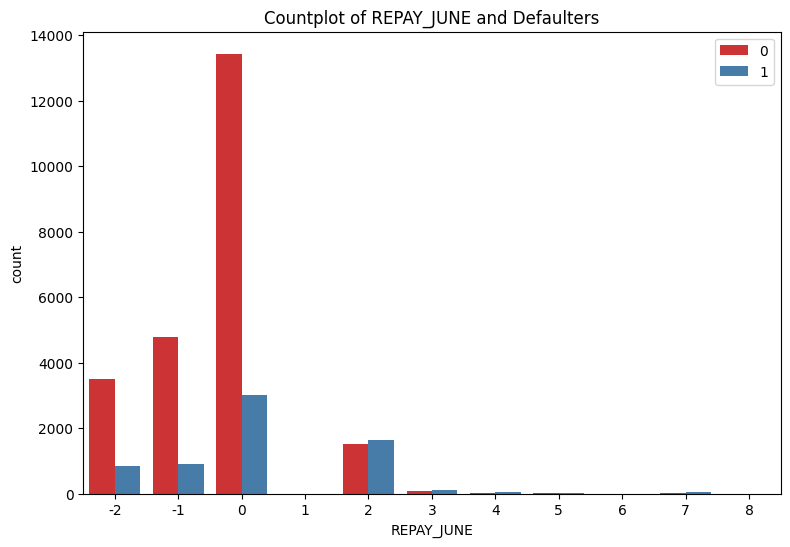

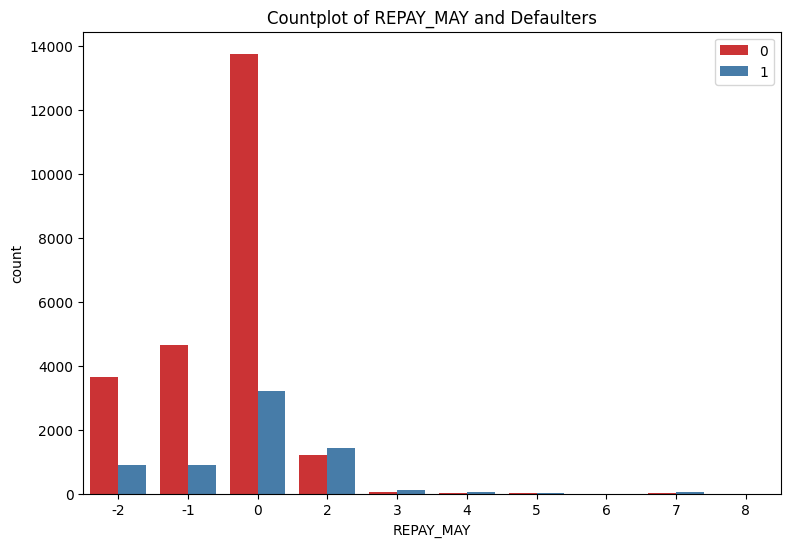

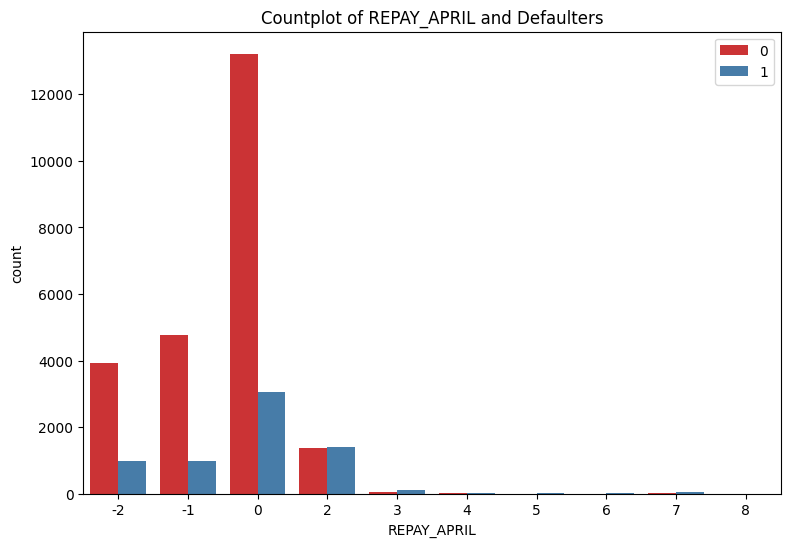

In [ ]:
# Amount paid in different months 
pay_scale = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL']
for col in pay_scale:
  fig, ax = plt.subplots(figsize = (9,6))
  sns.countplot(x = col, hue = 'Default_Payments',data = df,palette = 'Set1')
  ax.legend(loc = 'upper right')
  ax.set(title = 'Countplot of '+col+' and Defaulters')
  

### Describing the Xlabel of Repay scale

-2 = No consumption

-1 = paid in full

0 = use of revolving credit (paid minimum only)

1 = payment delay for one month

2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

---

### **Continous Independent Features with Dependent Variable**
---

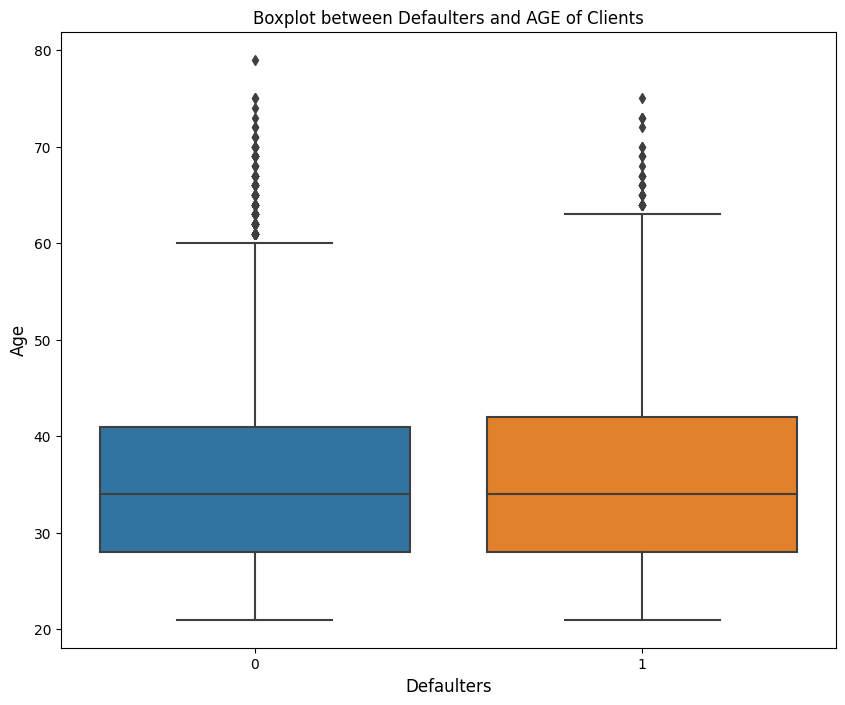

In [ ]:
# Boxplot AGE vs Defaulters
plt.figure(figsize = (10,8))
sns.boxplot(x = 'Default_Payments',y = 'AGE',data = df)
plt.title('Boxplot between Defaulters and AGE of Clients')
plt.xlabel('Defaulters',fontsize = 12)
plt.ylabel('Age',fontsize = 12)
plt.show()

* Median shows that our poplutaion of defaulters and not defaulters are around 35 years
* Two many outliers are above the ages of 60 years in both classification. It means old-age people may be defaulters.

Text(0, 0.5, 'Counts of defaulters')

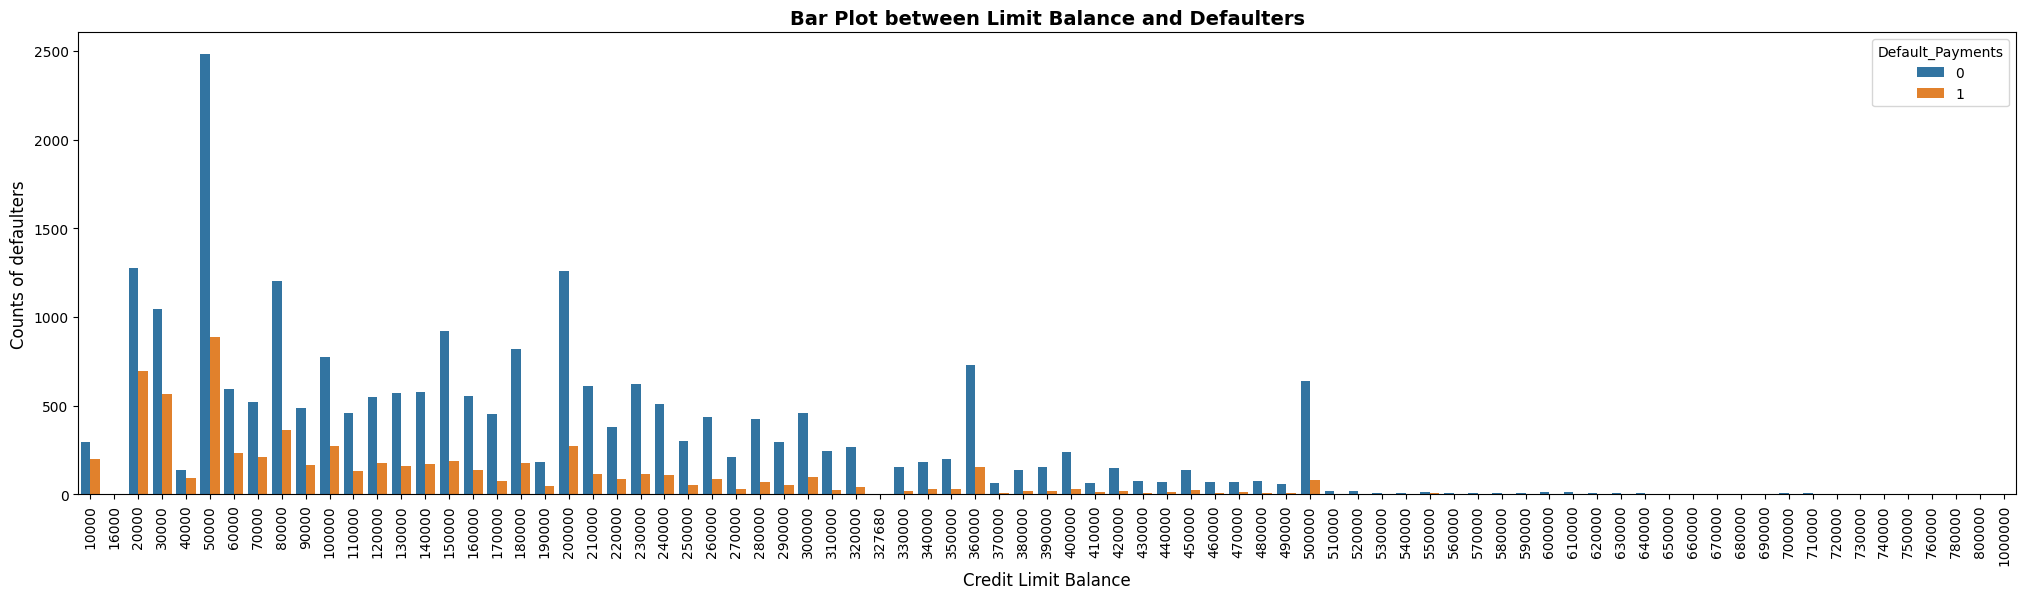

In [ ]:
# Limit Balance 
plt.figure(figsize = (25,6))
sns.countplot(x = 'LIMIT_BAL',hue = 'Default_Payments',data = df)
plt.xticks(rotation = 90)
plt.title('Bar Plot between Limit Balance and Defaulters', fontsize = 14, fontweight = 'bold')
plt.xlabel('Credit Limit Balance',fontsize = 12)
plt.ylabel('Counts of defaulters',fontsize = 12)

* Majority of the defaulters are those who have credit limit balance between 20,000 to 3,00,000
* After the credit limit 5,00,000, number of defaulters are almost negligible.

### **Lets Visualize the rest features of bill payments and amount of previous payments of different months**

In [ ]:
# Having just overview of mean of bill payments of defaulters
bill_amt = ['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JULY','BILL_AMT_JUNE','BILL_AMT_MAY','BILL_AMT_APRIL']
df.groupby('Default_Payments')[bill_amt].mean()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


* Defaulters do not have average bill payment amount not more than 48,000(NT Dollar)
* The most concerned area about the defaulters are around the average bill amount. 

In [ ]:
# min bill payments of defaulters & not defaulters
df.groupby('Default_Payments')[bill_amt].min()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,-165580,-69777,-157264,-170000,-81334,-209051
1,-6676,-17710,-61506,-65167,-53007,-339603


In [ ]:
# Max bill payments of defaulters & not defaulters
df.groupby('Default_Payments')[bill_amt].max()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL
Default_Payments,,,,,,
0,964511,983931,1664089,891586,927171,961664
1,613860,581775,578971,548020,547880,514975


* from above matrix we can conclude that defaulters lie within the range of maximum Bill Payment of approximately 60,000(NT Dollar)

---
**PAYMENT AMOUNT**

In [ ]:
#Let's have a look at mean of  previous payment of different months 
pay_amt = ['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
df.groupby("Default_Payments")[pay_amt].mean()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


* Defaulters do not have average previous bill payment amount not more than 3500(NT Dollar)
* The most concerned area about the defaulters are around the average previous bill payment amount.

In [ ]:
# minimum previous amount paid by defaulters
df.groupby('Default_Payments')[pay_amt].min()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,0,0,0,0,0,0
1,0,0,0,0,0,0


In [ ]:
# maximum previous amount paid by defaulters
df.groupby('Default_Payments')[pay_amt].max()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL
Default_Payments,,,,,,
0,873552,1684259,896040,621000,426529,528666
1,300000,358689,508229,432130,332000,345293


* from above matrix we can conclude that defaulters lie within the range of maximum previous bill Payment of approximately 50,000(NT Dollar)

<AxesSubplot: >

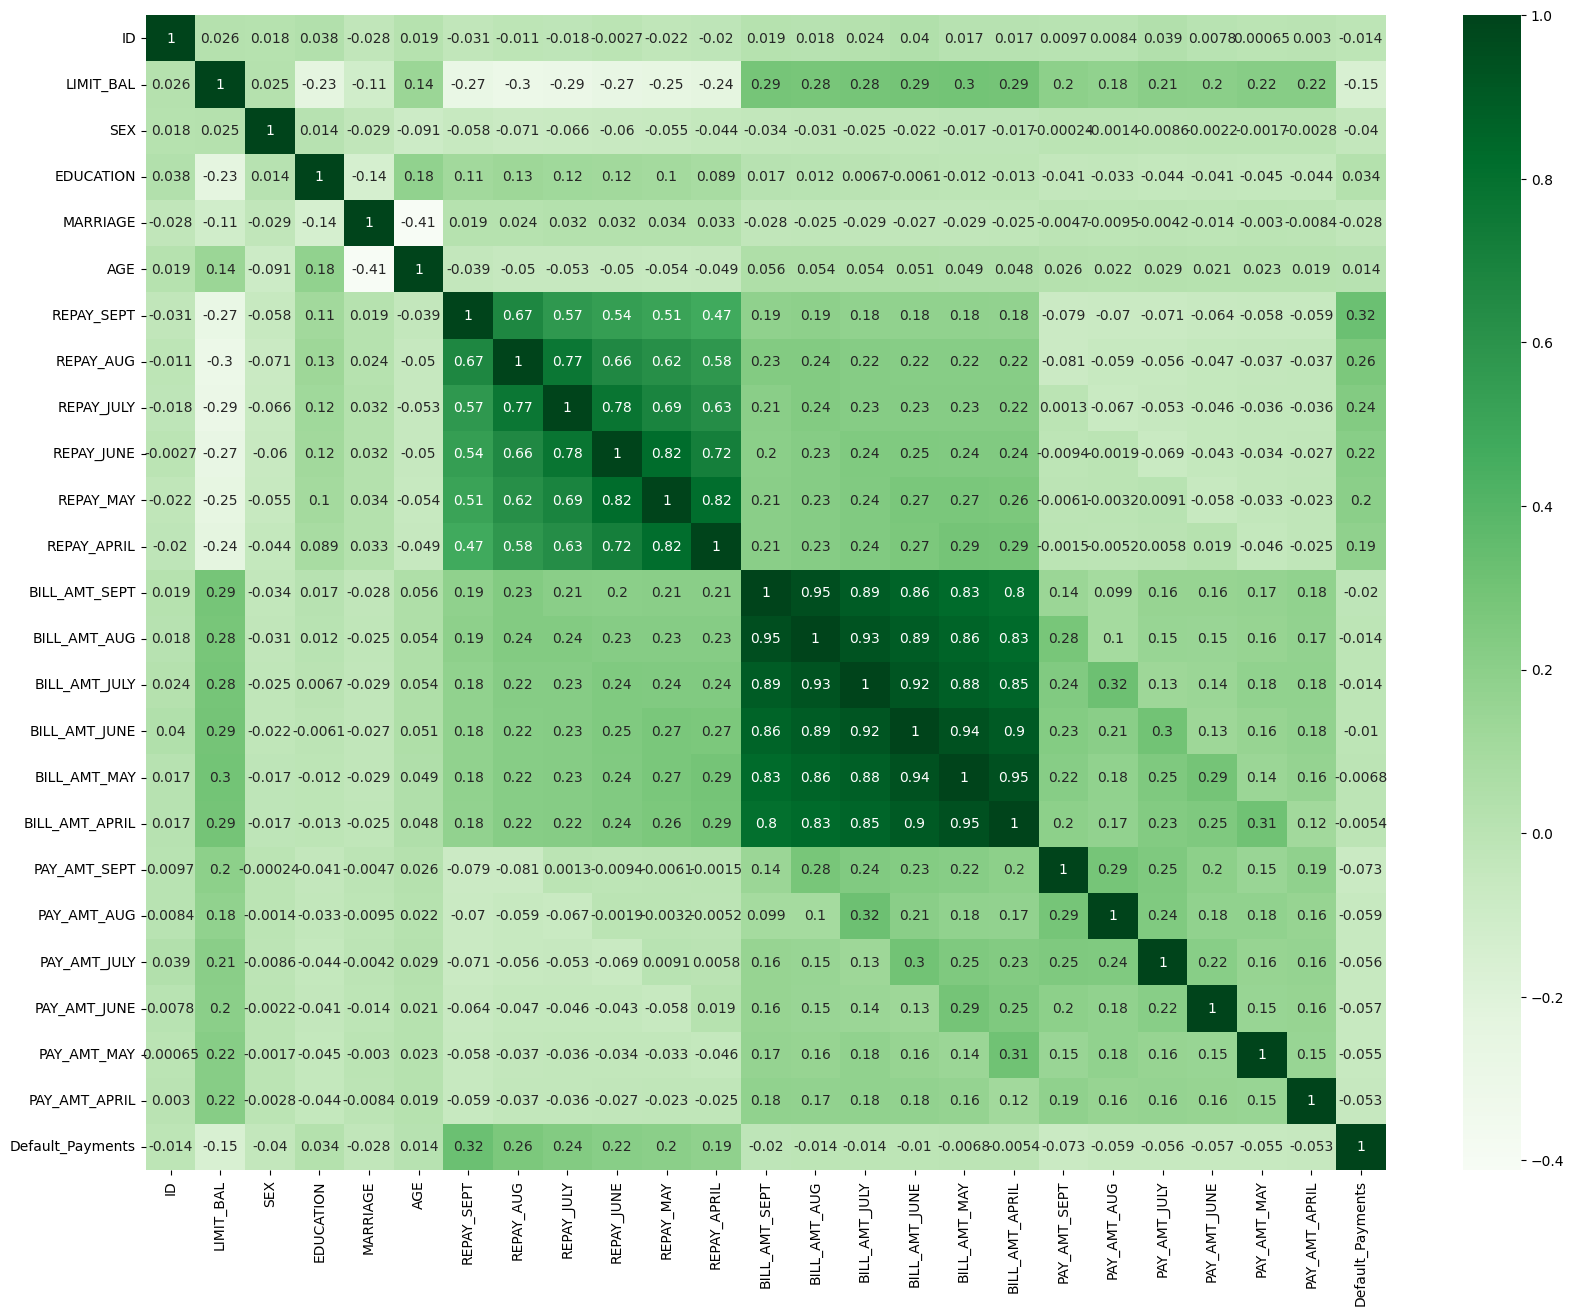

In [ ]:
#Checking correlation between columns
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap="Greens")

Here many features are correlated with each other, but we cant delete those features. Because it contains the past transaction details of the customers.

## Feature Engineering

## One Hot Encoding

In [ ]:
# making a copy of dataset
cred_dup_df = df.copy()

In [ ]:
# Transform features Marriage, Age and Education using one-hot-encoding
cred_dup_df = pd.get_dummies(cred_dup_df,columns = ['EDUCATION','SEX','MARRIAGE'])

In [ ]:
# renaming columns to get better understanding about dummy variables
cred_dup_df.rename(columns = {'EDUCATION_1':'EDUCATION_GRADUATE','EDUCATION_2':'EDUCATION_UNIVERSITY','EDUCATION_3':'EDUCATION_HIGH_SCHOOL','EDUCATION_4':'EDUCATION_OTHERS',
                              'SEX_1':'MALE','SEX_2':'FEMALE','MARRIAGE_1':'SINGLE','MARRIAGE_2':'MARRIED','MARRIAGE_3':'MARRIAGE_OTHERS'},inplace = True)
cred_dup_df.head(3)

,ID,LIMIT_BAL,AGE,REPAY_SEPT,REPAY_AUG,REPAY_JULY,REPAY_JUNE,REPAY_MAY,REPAY_APRIL,BILL_AMT_SEPT,...,Default_Payments,EDUCATION_GRADUATE,EDUCATION_UNIVERSITY,EDUCATION_HIGH_SCHOOL,EDUCATION_OTHERS,MALE,FEMALE,SINGLE,MARRIED,MARRIAGE_OTHERS
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,1,0,1,0,0,0,1,1,0,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,1,0,1,0,0,0,1,0,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,1,0,0,0,1,0,1,0


In [ ]:
# Transform features of repayment of different months using one-hot encoding
cred_dup_df = pd.get_dummies(cred_dup_df, columns = ['REPAY_SEPT','REPAY_AUG','REPAY_JULY','REPAY_JUNE','REPAY_MAY','REPAY_APRIL'])

In [ ]:
# drop the features that are in no use
cred_dup_df.drop(['ID','EDUCATION_OTHERS','MARRIAGE_OTHERS'],axis = 1,inplace = True)

In [ ]:
cred_dup_df

,LIMIT_BAL,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,...,REPAY_APRIL_-2,REPAY_APRIL_-1,REPAY_APRIL_0,REPAY_APRIL_2,REPAY_APRIL_3,REPAY_APRIL_4,REPAY_APRIL_5,REPAY_APRIL_6,REPAY_APRIL_7,REPAY_APRIL_8
0,20000,24,3913,3102,689,0,0,0,0,689,...,1,0,0,0,0,0,0,0,0,0
1,120000,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,1,0,0,0,0,0,0
2,90000,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,1,0,0,0,0,0,0,0
3,50000,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,1,0,0,0,0,0,0,0
4,50000,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,188948,192815,208365,88004,31237,15980,8500,20000,...,0,0,1,0,0,0,0,0,0,0
29996,150000,43,1683,1828,3502,8979,5190,0,1837,3526,...,0,0,1,0,0,0,0,0,0,0
29997,30000,37,3565,3356,2758,20878,20582,19357,0,0,...,0,0,1,0,0,0,0,0,0,0
29998,80000,41,-1645,78379,76304,52774,11855,48944,85900,3409,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
cred_dup_df.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY',
       'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY',
       'PAY_AMT_APRIL', 'Default_Payments', 'EDUCATION_GRADUATE',
       'EDUCATION_UNIVERSITY', 'EDUCATION_HIGH_SCHOOL', 'MALE', 'FEMALE',
       'SINGLE', 'MARRIED', 'REPAY_SEPT_-2', 'REPAY_SEPT_-1', 'REPAY_SEPT_0',
       'REPAY_SEPT_1', 'REPAY_SEPT_2', 'REPAY_SEPT_3', 'REPAY_SEPT_4',
       'REPAY_SEPT_5', 'REPAY_SEPT_6', 'REPAY_SEPT_7', 'REPAY_SEPT_8',
       'REPAY_AUG_-2', 'REPAY_AUG_-1', 'REPAY_AUG_0', 'REPAY_AUG_1',
       'REPAY_AUG_2', 'REPAY_AUG_3', 'REPAY_AUG_4', 'REPAY_AUG_5',
       'REPAY_AUG_6', 'REPAY_AUG_7', 'REPAY_AUG_8', 'REPAY_JULY_-2',
       'REPAY_JULY_-1', 'REPAY_JULY_0', 'REPAY_JULY_1', 'REPAY_JULY_2',
       'REPAY_JULY_3', 'REPAY_JULY_4', 'REPAY_JULY_5', 'REPAY_JULY_6',
       'REPAY_JULY_7', 'REPAY_JULY_8', 'REPAY_JUNE_-2', 'REPAY_JUNE_-1',

In [ ]:
# independent variable and dependent variable
X=cred_dup_df
y=df['Default_Payments']

## **Splitting *X* and *y* into Training and Testing Dataset**

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Shape of X_train: (21000, 86)
Shape of y_train: (21000,)
Shape of X_test: (9000, 86)
Shape of y_test: (9000,)


## Handelling Imbalance Dataset with SMOTE

In [ ]:
# importing SMOTE 
from imblearn.over_sampling import SMOTE

print('Dataset Before:\n', y_train.value_counts())
smt = SMOTE()

# fit predictor and target variable
X_train_smt, y_train_smt = smt.fit_resample(X_train,y_train)

print('\nDataset After:\n',y_train_smt.value_counts())

Dataset Before:
 0    16304
1     4696
Name: Default_Payments, dtype: int64

Dataset After:
 0    16304
1    16304
Name: Default_Payments, dtype: int64


## Applying Clasification Algorithms

In [ ]:
#create a function to calculate evaluation matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

train_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])
test_matrix = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score_', 'roc'])
final_result=pd.DataFrame()
eval_score=[]
def get_score(model,y_true, y_pred):
    score={}
    score['model']=model
    score['accuracy']= round(accuracy_score(y_true,y_pred)*100,2)
    score['precision'] = round(precision_score(y_true,y_pred)*100,2)
    score['recall'] = round(recall_score(y_true,y_pred)*100,2)
    score['f1_score_'] = round(f1_score(y_true,y_pred)*100,2)
    score['roc'] = round(roc_auc_score(y_true,y_pred)*100,2)
    eval_score.append(score)
def result():
    return pd.DataFrame(eval_score)

def get_cm(y_true, y_pred):
  # Get the confusion matrix for both train and test
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  labels = ['Not Defaulter', 'Defaulter']
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
  
  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels')
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression()
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model = GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train_smt,y_train_smt)


Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [ ]:
# Best parameters 
logistic_grid_model.best_params_   

{'C': 0.9, 'penalty': 'l2'}

In [ ]:
logistic_grid_model.best_score_

0.6383888183799092

In [ ]:
#prediction
y_pred_lr_train = logistic_grid_model.predict(X_train)
y_pred_lr_test = logistic_grid_model.predict(X_test)

In [ ]:
#evaluation matrix on train data:
get_score('logistic_train',y_train, y_pred_lr_train)
get_score('logistic_train',y_test, y_pred_lr_test)
result()

,model,accuracy,precision,recall,f1_score_,roc
0,logistic_train,68.27,32.77,39.82,35.95,58.14
1,logistic_train,68.06,30.55,37.84,33.80,57.10


[[5391 1669]
 [1206  734]]


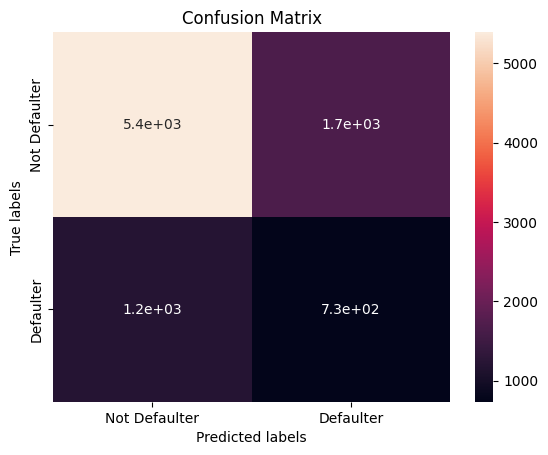

In [ ]:
#confusion matrix for test data:
get_cm(y_test, y_pred_lr_test)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# creating param dict to check diffirent value of parameter
max_depth=[13,14,15,16,17,18,19,20]
min_samples_leaf=[10,11,12,13,14,15]
splitter = ['random']
params = {'splitter':splitter, 'max_depth' :max_depth, 'min_samples_leaf': min_samples_leaf}

In [ ]:
#fit the parameter
dt_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=params,verbose=0)
#training model
dt_clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [10, 11, 12, 13, 14, 15],
                         'splitter': ['random']})

In [ ]:
dt_clf.best_params_

{'max_depth': 13, 'min_samples_leaf': 10, 'splitter': 'random'}

In [ ]:
#prediction
y_pred_dt_train = dt_clf.predict(X_train)
y_pred_dt_test = dt_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score('Decision_Tree_train',y_train, y_pred_dt_train)
result()

,model,accuracy,precision,recall,f1_score_,roc
0,logistic_train,68.27,32.77,39.82,35.95,58.14
1,logistic_train,68.06,30.55,37.84,33.80,57.10
2,Decision_Tree_train,100.00,100.00,100.00,100.00,100.00


In [ ]:
#evaluation matrix on test data
score = get_score('Decision_Tree_test',y_test, y_pred_dt_test)
result()

,model,accuracy,precision,recall,f1_score_,roc
0,logistic_train,68.27,32.77,39.82,35.95,58.14
1,logistic_train,68.06,30.55,37.84,33.80,57.10
2,Decision_Tree_train,100.00,100.00,100.00,100.00,100.00
3,Decision_Tree_test,100.00,100.00,100.00,100.00,100.00


[[16304     0]
 [    0  4696]]


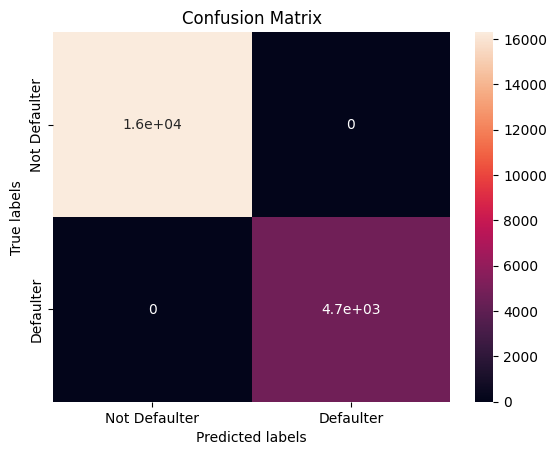

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_dt_train)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors' : [2,3,4,5]}

In [ ]:
#fit the parameter
knn = GridSearchCV(KNeighborsClassifier() , param_grid, n_jobs = -1, verbose = 3, cv = 3)
#training model
knn.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5]}, verbose=3)

In [ ]:
knn.best_params_

{'n_neighbors': 2}

In [ ]:
#prediction
y_pred_knn_train = knn.predict(X_train)
y_pred_knn_test = knn.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_knn_train)
train_matrix['KNN'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.613195,0.796019,0.965514
precision,0.608560,0.847629,1.000000
recall,0.633945,0.721651,0.931009
f1_score_,0.620993,0.779584,0.964272
roc,0.613201,0.795999,0.965505


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_knn_test)
test_matrix['KNN'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN
accuracy,0.608817,0.748270,0.784863
precision,0.603940,0.791925,0.780522
recall,0.633733,0.673938,0.792985
f1_score_,0.618478,0.728183,0.786704
roc,0.608801,0.748318,0.784858


[[16359     0]
 [ 1128 15222]]


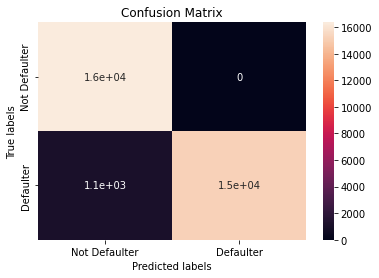

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_knn_train)

# Random Forest

In [ ]:
#import the packages
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 25, min_samples_leaf=12)

In [ ]:
#training model
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=12)

In [ ]:
#prediction
y_pred_rf_train = rf_clf.predict(X_train)
y_pred_rf_test = rf_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_rf_train)
train_matrix['Random forest'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.613195,0.796019,0.965514,0.844997
precision,0.608560,0.847629,1.000000,0.878270
recall,0.633945,0.721651,0.931009,0.800917
f1_score_,0.620993,0.779584,0.964272,0.837812
roc,0.613201,0.795999,0.965505,0.844985


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_rf_test)
test_matrix['Random forest'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest
accuracy,0.608817,0.748270,0.784863,0.794279
precision,0.603940,0.791925,0.780522,0.825607
recall,0.633733,0.673938,0.792985,0.746507
f1_score_,0.618478,0.728183,0.786704,0.784067
roc,0.608801,0.748318,0.784858,0.794310


[[14544  1815]
 [ 3255 13095]]


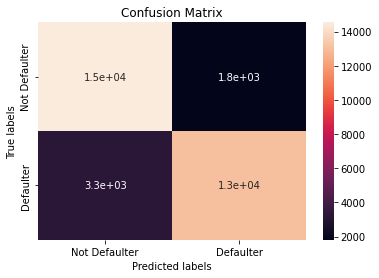

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_rf_train)

# SVC

In [ ]:
#import the packages
from sklearn.svm import SVC
# defining parameter range 
param_grid = {'C': [100],'kernel': ['rbf']}

In [ ]:
#set the parmeter
#fit the parameter
svc_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)

svc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [100], 'kernel': ['rbf']}, scoring='accuracy',
             verbose=3)

In [ ]:
optimal_SVC_clf = svc_clf.best_estimator_

In [ ]:
# Get the predicted classes
y_pred_svc_train = optimal_SVC_clf.predict(X_train)
y_pred_svc_test = optimal_SVC_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_svc_train)
train_matrix['SVC'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC
accuracy,0.613195,0.796019,0.965514,0.844997,0.668593
precision,0.608560,0.847629,1.000000,0.878270,0.629173
recall,0.633945,0.721651,0.931009,0.800917,0.820734
f1_score_,0.620993,0.779584,0.964272,0.837812,0.712299
roc,0.613201,0.795999,0.965505,0.844985,0.668635


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_svc_test)
test_matrix['SVC'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC
accuracy,0.608817,0.748270,0.784863,0.794279,0.645481
precision,0.603940,0.791925,0.780522,0.825607,0.610630
recall,0.633733,0.673938,0.792985,0.746507,0.804249
f1_score_,0.618478,0.728183,0.786704,0.784067,0.694191
roc,0.608801,0.748318,0.784858,0.794310,0.645379


[[ 8450  7909]
 [ 2931 13419]]


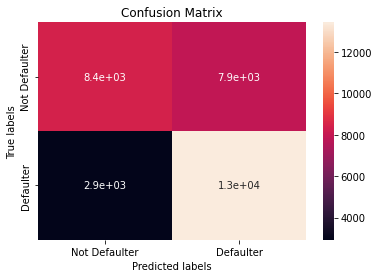

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_svc_train)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#setting parameters for gboost
parameters={'max_depth':[12],'min_samples_leaf':[12],'learning_rate':[.05]}

In [ ]:
#set the parmeter
#fit the parameter
gb_clf = GridSearchCV(GradientBoostingClassifier(), param_grid = parameters, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
gb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05], 'max_depth': [12],
                         'min_samples_leaf': [12]},
             scoring='accuracy', verbose=3)

In [ ]:
gb_clf.best_params_


{'learning_rate': 0.05, 'max_depth': 12, 'min_samples_leaf': 12}

In [ ]:
# Get the predicted classes
y_pred_gb_train = gb_clf.predict(X_train)
y_pred_gb_test = gb_clf.predict(X_test)

In [ ]:
#evaluation matrix on train data
score = get_score(y_train, y_pred_gb_train)
train_matrix['GB'] =score
train_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC,GB
accuracy,0.613195,0.796019,0.965514,0.844997,0.668593,0.925311
precision,0.608560,0.847629,1.000000,0.878270,0.629173,0.951028
recall,0.633945,0.721651,0.931009,0.800917,0.820734,0.896758
f1_score_,0.620993,0.779584,0.964272,0.837812,0.712299,0.923096
roc,0.613201,0.795999,0.965505,0.844985,0.668635,0.925303


In [ ]:
#evaluation matrix on test data
score = get_score(y_test, y_pred_gb_test)
test_matrix['GB'] =score
test_matrix

,Logistic Reggression,Decision Tree,KNN,Random forest,SVC,GB
accuracy,0.608817,0.748270,0.784863,0.794279,0.645481,0.826878
precision,0.603940,0.791925,0.780522,0.825607,0.610630,0.858080
recall,0.633733,0.673938,0.792985,0.746507,0.804249,0.783576
f1_score_,0.618478,0.728183,0.786704,0.784067,0.694191,0.819137
roc,0.608801,0.748318,0.784858,0.794310,0.645379,0.826906


[[15604   755]
 [ 1688 14662]]


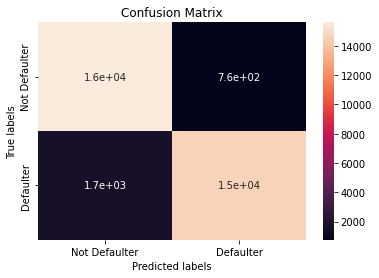

In [ ]:
#confusion matrix
get_cm(y_train, y_pred_gb_train)

# Model validation

In [ ]:
#all models evaluation matrices
final_matrices=test_matrix.transpose().reset_index().rename(columns={'index':'Models'})

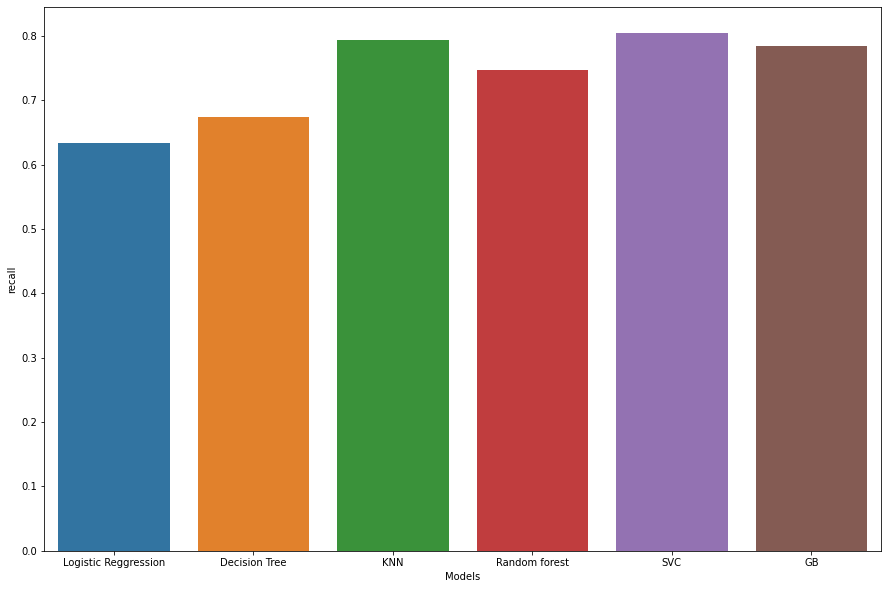

In [ ]:
#plot recall scores for all model
plt.figure(figsize=(15,10))
sns.barplot(x='Models',y='recall',data=final_matrices)

# LIME

In [ ]:
pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular


In [ ]:
# LIME SECTION
import lime
import lime.lime_tabular


In [ ]:
# LIME has one explainer for all the models
lime_svc = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns.values.tolist(),
                                                  verbose=True, mode='classification')


In [ ]:
# Choose the 5th instance and use it to predict the results
p = 5
exp_svc = lime_svc.explain_instance(X_test.values[p], svc_clf.predict_proba, num_features=6)
exp_svc.show_in_notebook(show_all=False)

Intercept 0.1691719250531353
Prediction_local [0.31399492]
Right: 0.6643264618191161


# Feature importance

In [ ]:

features = X_train.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances[:10])

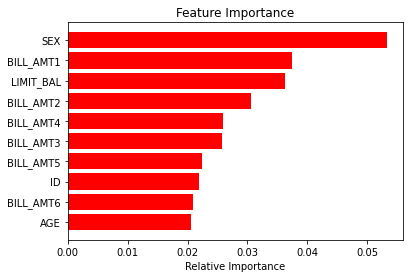

In [ ]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# ELI5

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import eli5
from eli5.lime import TextExplainer

te = TextExplainer(random_state=42)
te.fit(doc, pipe.predict_proba)
te.show_prediction(target_names=twenty_train.target_names)

In [ ]:
#import eli5
import eli5 as eli
feature_names=list(X_test.columns)

In [ ]:
for_instance=2

In [ ]:
 eli.show_prediction(gb_clf.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

## From above charts we can say that lmit baance and the last months transactions are the important features for prediction the defaulter